### I played with this dataset for various analysis, like
### 1. Correlation
### 2. Most viewed channel
### 3. Most subscribed channel
### 4. List of channels in each genre
### 5. Least and Highest ranked channel in each genre
### 6. Most viewed channel name in each genre

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/top-300-youtube-channels/top-300-youtube-channels.csv")
data.head()

,Unnamed: 0,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,0,1,T-Series,237000000,216495600668,18831,Music,2006
1,1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015


## Data Preparation

In [3]:
data = data.drop(columns = "Unnamed: 0",axis=0)

In [4]:
data.head()

,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,216495600668,18831,Music,2006
1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,Education,2006
2,3,SET India,152000000,140138068504,105649,Film & Animation,2006
3,4,Sony SAB,77500000,92952274861,65028,Film & Animation,2007
4,5,✿ Kids Diana Show,108000000,88452629066,1070,People & Blogs,2015


In [5]:
data.isnull().sum()

Rank                0
Channel_Name        0
Subscriber_Count    0
Video_Views         0
Video_Count         0
Genre               0
Channel_Started     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              296 non-null    int64 
 1   Channel_Name      296 non-null    object
 2   Subscriber_Count  296 non-null    int64 
 3   Video_Views       296 non-null    int64 
 4   Video_Count       296 non-null    int64 
 5   Genre             296 non-null    object
 6   Channel_Started   296 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 16.3+ KB


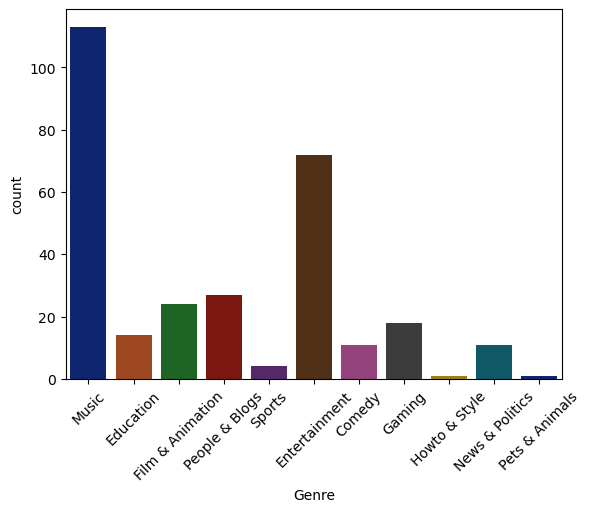

In [7]:
sns.countplot(data,x = 'Genre',palette = 'dark')
plt.xticks(rotation = 45)
plt.show()

In [8]:
print(f'Most top channels of youtube are under genre : {data.Genre[0]} ')

Most top channels of youtube are under genre : Music 


## Exploratory Data Analysis

In [9]:
data.describe()

,Rank,Subscriber_Count,Video_Views,Video_Count,Channel_Started
count,296.000000,2.960000e+02,2.960000e+02,296.000000,296.000000
mean,150.760135,3.159155e+07,2.199628e+10,19174.331081,2011.368243
std,86.813964,2.471406e+07,1.942543e+10,46072.700205,3.997822
min,1.000000,3.720000e+06,1.138766e+10,15.000000,2005.000000
25%,75.750000,1.737500e+07,1.357843e+10,386.250000,2008.000000
50%,151.500000,2.570000e+07,1.633676e+10,1984.500000,2011.000000
75%,225.250000,3.675000e+07,2.284494e+10,8558.000000,2014.000000
max,300.000000,2.370000e+08,2.164956e+11,345736.000000,2021.000000


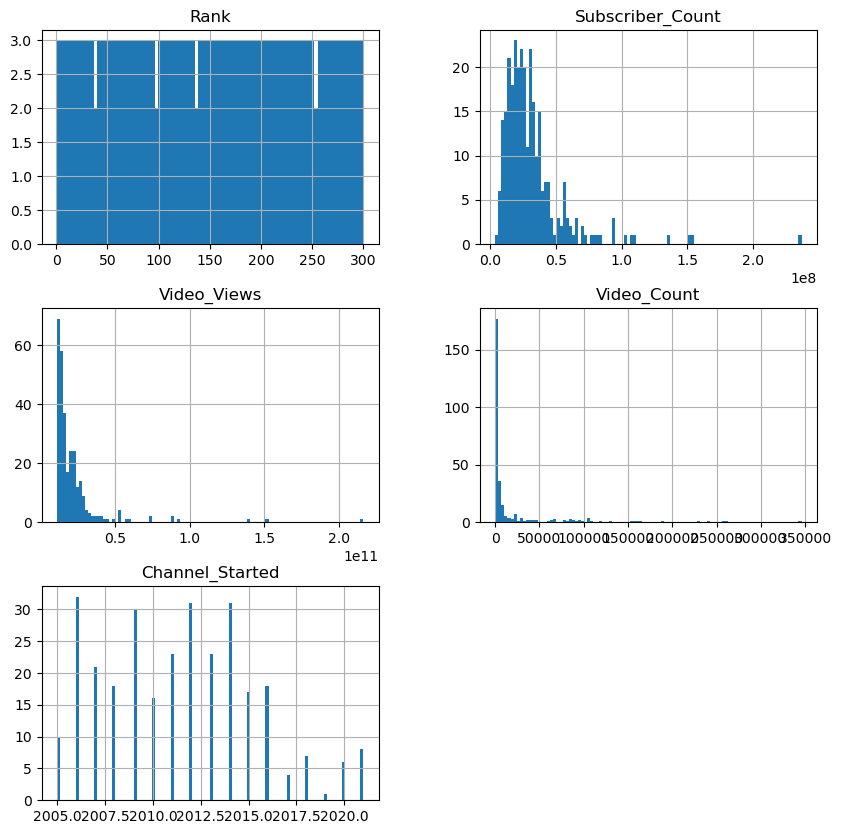

In [10]:
data.hist(bins = 100,figsize = (10,10))
plt.show()

## Checking for Outliers

<Figure size 640x480 with 0 Axes>

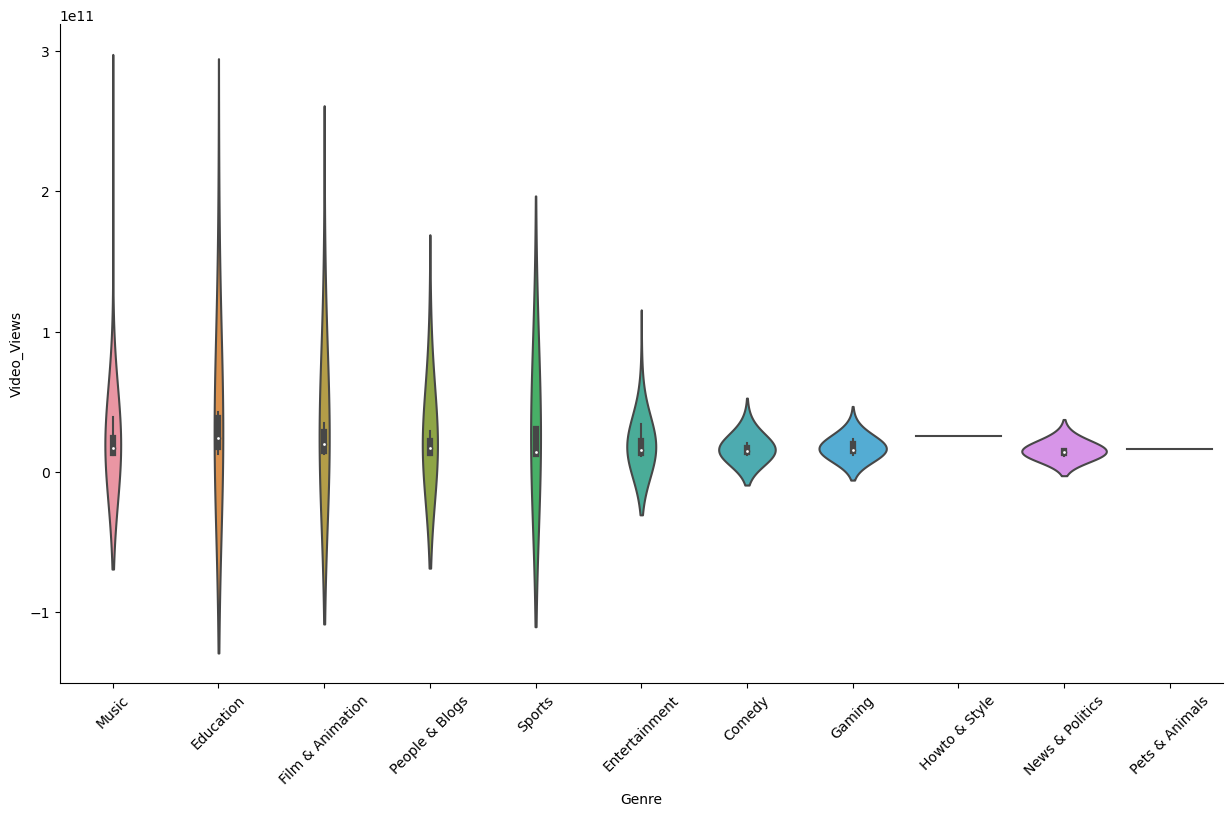

In [11]:
fig = plt.gcf()
g = sns.catplot(data,x='Genre',y = 'Video_Views',kind = 'violin',bw = 2)
g.set_xticklabels(rotation = 45)
g.fig.set_figwidth(15)
g.fig.set_figheight(8)


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
le.classes_

array(['Comedy', 'Education', 'Entertainment', 'Film & Animation',
       'Gaming', 'Howto & Style', 'Music', 'News & Politics',
       'People & Blogs', 'Pets & Animals', 'Sports'], dtype=object)

In [13]:
data.head()

,Rank,Channel_Name,Subscriber_Count,Video_Views,Video_Count,Genre,Channel_Started
0,1,T-Series,237000000,216495600668,18831,6,2006
1,2,Cocomelon - Nursery Rhymes,154000000,152638999634,861,1,2006
2,3,SET India,152000000,140138068504,105649,3,2006
3,4,Sony SAB,77500000,92952274861,65028,3,2007
4,5,✿ Kids Diana Show,108000000,88452629066,1070,8,2015


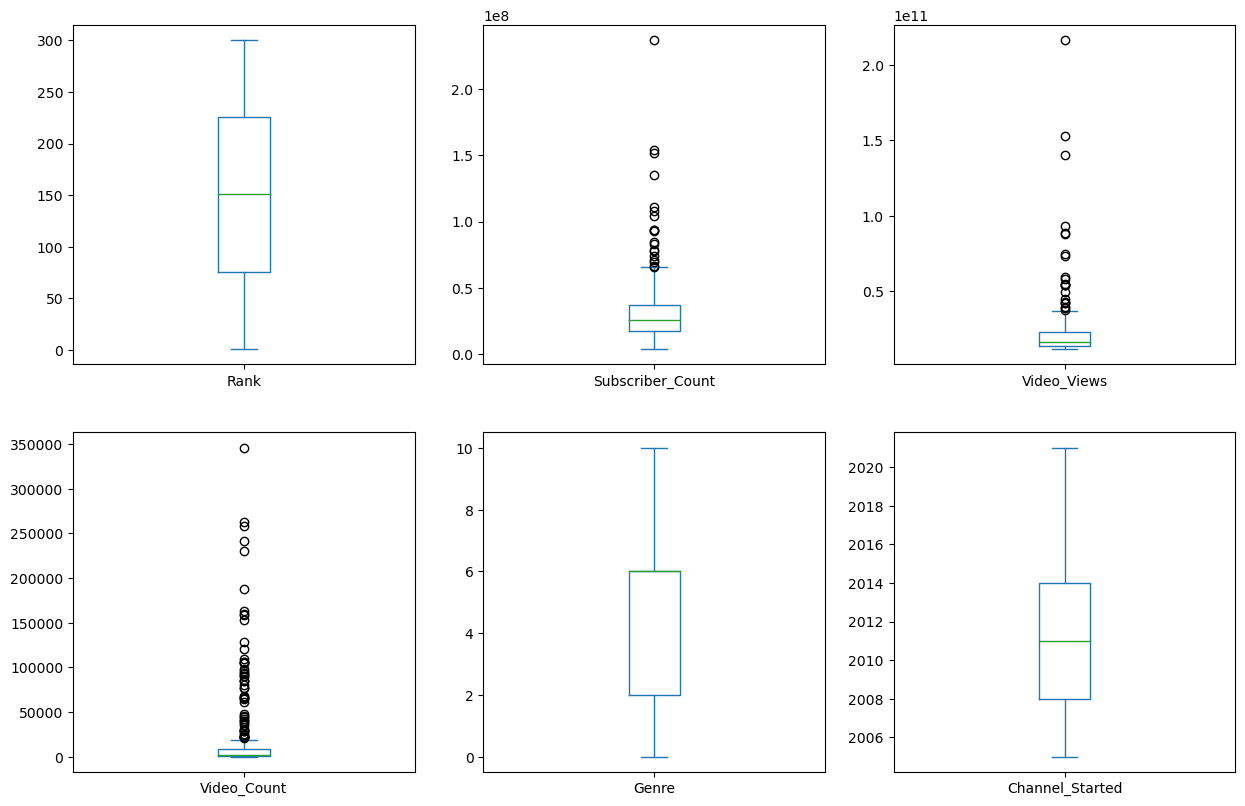

In [14]:
data[data.columns].plot(kind = 'box',subplots = True, layout=(3,3), figsize=(15,15))
plt.show()

## Correlation

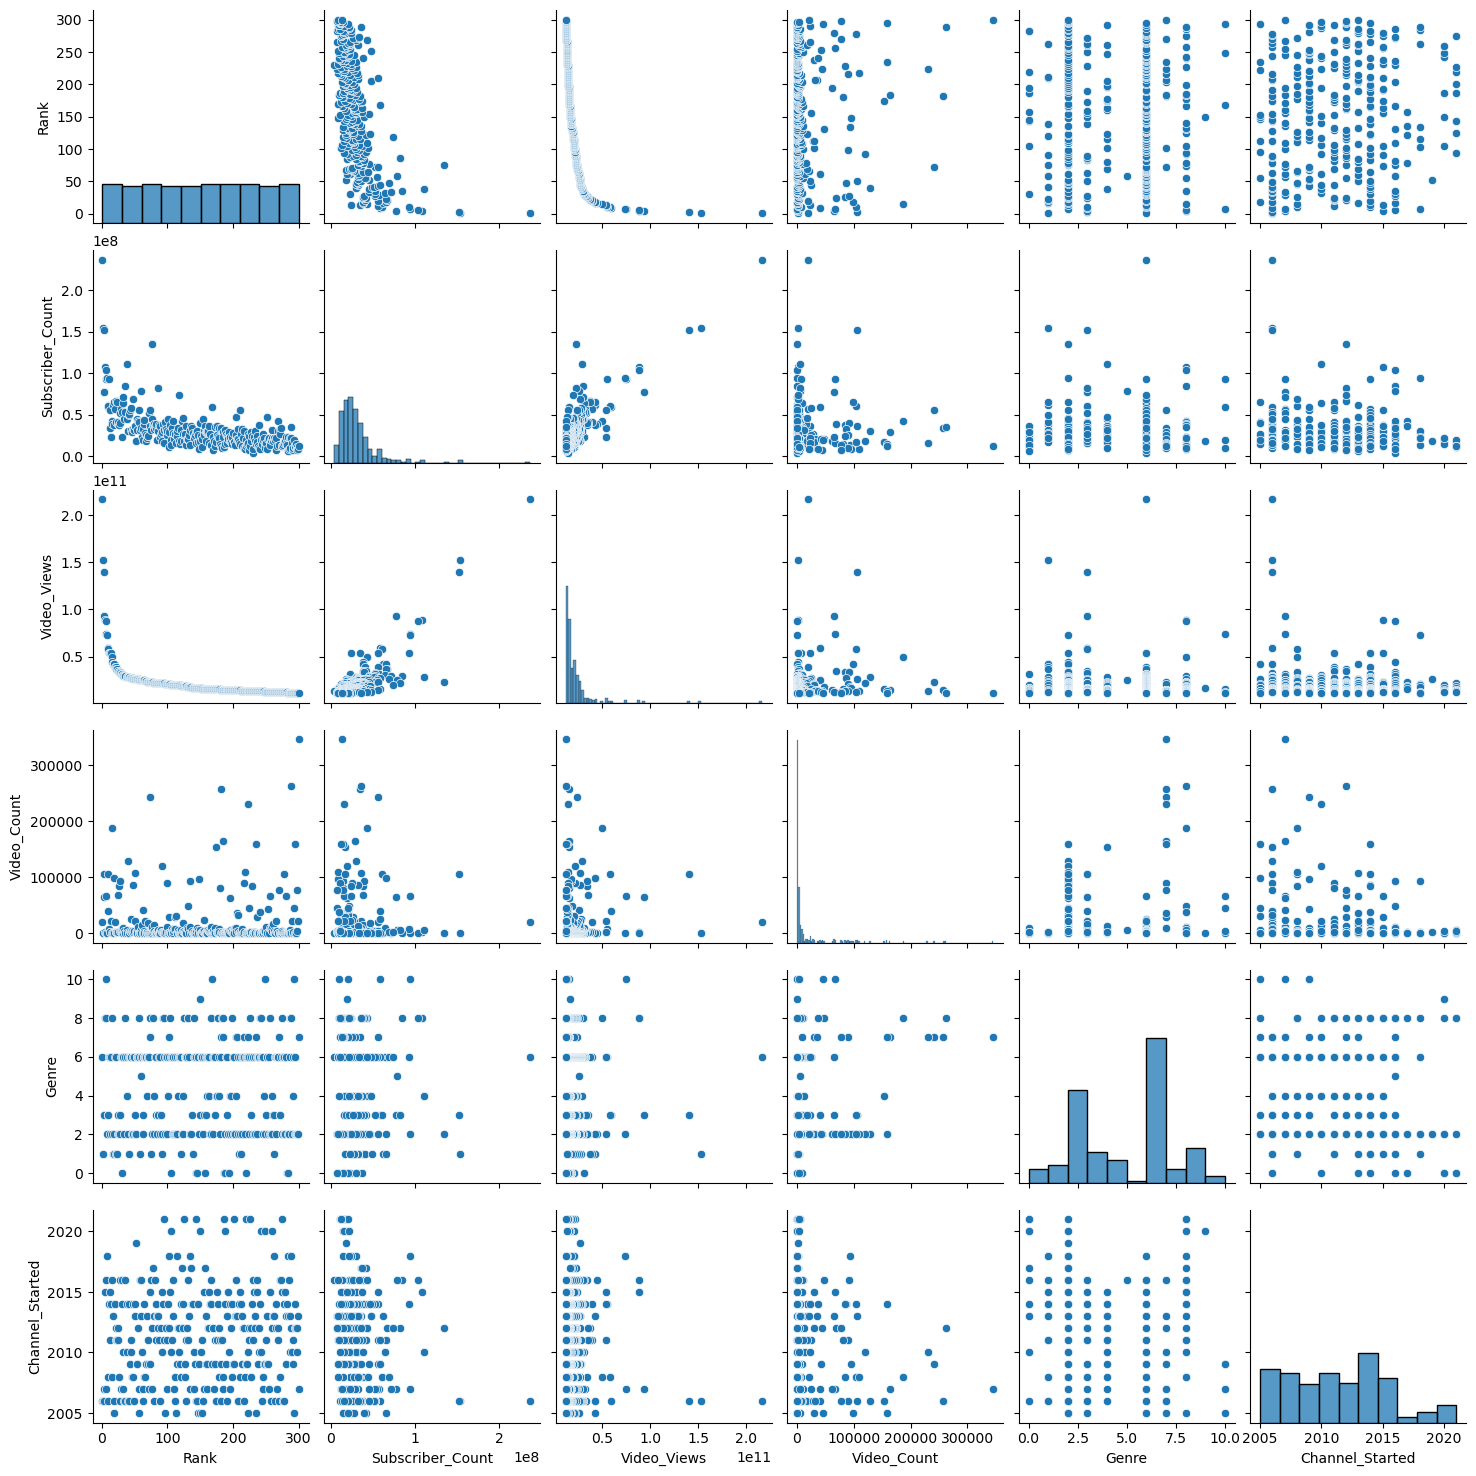

In [15]:
sns.pairplot(data)

<AxesSubplot:>

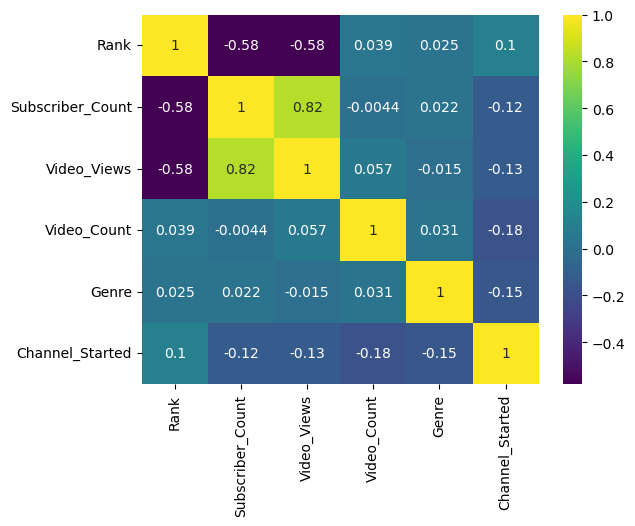

In [16]:
sns.heatmap(data.corr(),annot = True,cmap = 'viridis')

### Rank and Video views are inversely proportional
### Rank and Subscriber count are inversely proportional
### Subscriber count and Video views are positively correlated

<AxesSubplot:xlabel='Subscriber_Count', ylabel='Video_Views'>

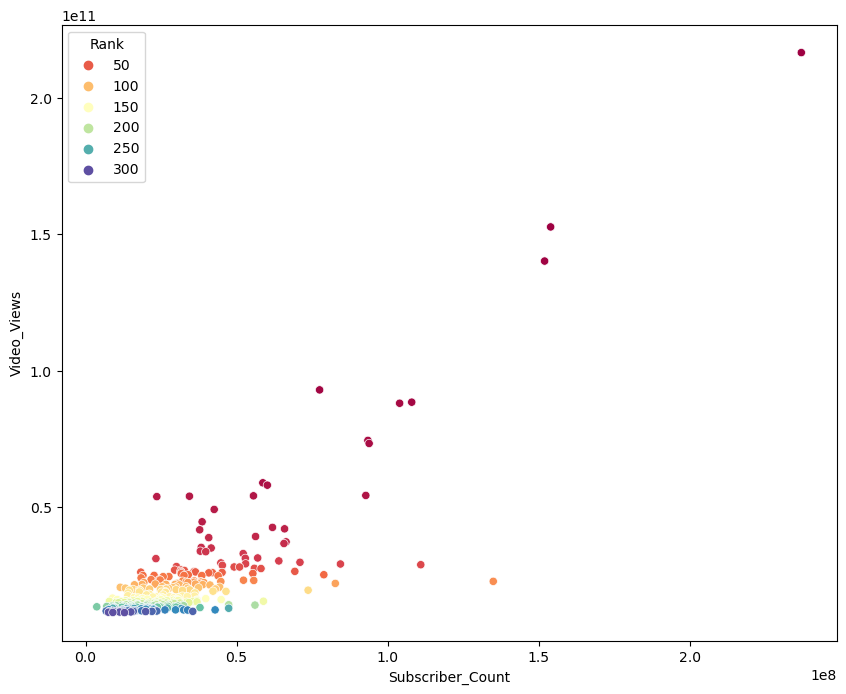

In [17]:
plt.subplots(figsize=(10,8))
sns.scatterplot(data,x = 'Subscriber_Count',y = 'Video_Views',hue = 'Rank',palette = 'Spectral')


#### Besides having outliers, they are not removed here, as removing outliers will affect the data and will not give significant results. 

## Data Analysis

In [18]:
data.columns


Index(['Rank', 'Channel_Name', 'Subscriber_Count', 'Video_Views',
       'Video_Count', 'Genre', 'Channel_Started'],
      dtype='object')

In [19]:
data['Genre']=le.inverse_transform(data['Genre'])

In [20]:
grp1 = data.groupby('Genre')['Channel_Name','Rank','Subscriber_Count','Video_Views'].min().sort_values(by = 'Video_Views',ascending = False)
grp1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Channel_Name,Rank,Subscriber_Count,Video_Views
Genre,,,,
Howto & Style,5-Minute Crafts,59,78900000,25251693106
Pets & Animals,That Little Puff,149,18900000,16582763026
Education,BabyBus - Canciones Infantiles & Videos para N...,2,17300000,12675495179
Film & Animation,Colors TV,3,15700000,12367072234
Comedy,Alan Chikin Chow,31,6830000,11958012432
People & Blogs,ABP NEWS,5,9250000,11840564703
Gaming,A4,38,9840000,11791649003
Sports,Dude Perfect,7,9520000,11761981184
Music,1theK (원더케이),1,3720000,11734620739


In [21]:
print(f'Most viewed channel is : {grp1.iloc[0,0]}, which is from genre : {grp1.index[0]} ')

Most viewed channel is : 5-Minute Crafts, which is from genre : Howto & Style 


In [22]:
grp2 = data.groupby('Genre')['Channel_Name','Rank','Subscriber_Count','Video_Views'].min().sort_values(by = 'Subscriber_Count',ascending = False)
grp2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Channel_Name,Rank,Subscriber_Count,Video_Views
Genre,,,,
Howto & Style,5-Minute Crafts,59,78900000,25251693106
Pets & Animals,That Little Puff,149,18900000,16582763026
Education,BabyBus - Canciones Infantiles & Videos para N...,2,17300000,12675495179
Film & Animation,Colors TV,3,15700000,12367072234
News & Politics,ABC News,73,10300000,11387663843
Gaming,A4,38,9840000,11791649003
Sports,Dude Perfect,7,9520000,11761981184
People & Blogs,ABP NEWS,5,9250000,11840564703
Entertainment,A.O.D,8,7020000,11442069884


In [23]:
print(f'Most subscribed channel is : {grp2.iloc[0,0]}, which is from genre : {grp2.index[0]} ')

Most subscribed channel is : 5-Minute Crafts, which is from genre : Howto & Style 


In [24]:
print('Highest Rank and Lowest Rank in each Genre:\n\n')
data.groupby('Genre')['Channel_Name','Rank'].agg(['min','max']).sort_values([('Rank','min')])

Highest Rank and Lowest Rank in each Genre:




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Channel_Name  \
                                                                min   
Genre                                                                 
Music                                                  1theK (원더케이)   
Education         BabyBus - Canciones Infantiles & Videos para N...   
Film & Animation                                          Colors TV   
People & Blogs                                             ABP NEWS   
Sports                                                 Dude Perfect   
Entertainment                                                 A.O.D   
Comedy                                             Alan Chikin Chow   
Gaming                                                           A4   
Howto & Style                                       5-Minute Crafts   
News & Politics                                            ABC News   
Pets & Animals                                     That Little Puff   

                                     Rank       
                                 max  min  max  
Genre                                           
Music                    toyorbabytv    1  294  
Education         infobells - Telugu    2  262  
Film & Animation      Маша и Медведь    3  272  
People & Blogs     ✿ Kids Diana Show    5  289  
Sports                           WWE    7  293  
Entertainment             ช่อง one31    8  299  
Comedy                        東海オンエア   31  283  
Gaming                   rezendeevil   38  292  
Howto & Style        5-Minute Crafts   59   59  
News & Politics             Zee News   73  300  
Pets & Animals      That Little Puff  149  149

In [25]:
print('List of Music youtube channels:\n\n')
f1 = data[data['Genre'] == 'Music']
grp4 = f1.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp4

List of Music youtube channels:




,Genre,Music
Channel_Name,Rank,
T-Series,1,216495600668
Zee Music Company,11,54295114324
El Reino Infantil,12,54151900416
netd müzik,14,53867289619
Wave Music,20,39258909308
...,...,...
Indosiar,280,12020712027
AdeleVEVO,281,12018947879
OneDirectionVEVO,287,11893387937


In [26]:
print('List of Entertainment youtube channels:\n\n')
f2 = data[data['Genre'] == 'Entertainment']
grp5 = f2.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp5

List of Entertainment youtube channels:




,Genre,Entertainment
Channel_Name,Rank,
Vlad and Niki,8,73333582362
Ryan's World,13,54008224558
Toys and Colors,16,44642348659
Zee TV,18,42064672138
WorkpointOfficial,24,35265515153
...,...,...
eltrece,295,11709869278
Jake Fellman,296,11618626248
DisneyJuniorUK,297,11586962179


In [27]:
print('List of People & Blogs youtube channels:\n\n')
f3 = data[data['Genre'] == 'People & Blogs']
grp6 = f3.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp6

List of People & Blogs youtube channels:




,Genre,People & Blogs
Channel_Name,Rank,
✿ Kids Diana Show,5,88452629066
Like Nastya,6,88060349741
ABS-CBN Entertainment,15,49164270097
BLACKPINK,36,29178260651
Shakira,56,25929013006
Maria Clara & JP,74,22985098433
shfa2 - شفا,78,22708961183
LUCCAS NETO - LUCCAS TOON,93,21619683879
LeoNata Family,94,21562386713


In [28]:
print('List of Film & Animation youtube channels:\n\n')
f4 = data[data['Genre'] == 'Film & Animation']
grp7 = f4.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp7

List of Film & Animation youtube channels:




,Genre,Film & Animation
Channel_Name,Rank,
SET India,3,140138068504
Sony SAB,4,92952274861
Movieclips,9,58923017461
Colors TV,10,58056997206
Маша и Медведь,25,35041524012
YRF,28,33001702137
Sony PAL,50,26412224144
Galinha Pintadinha,63,24972463590
Masha and The Bear,83,22375849147


In [29]:
print('List of Gaming youtube channels:\n\n')
f5 = data[data['Genre'] == 'Gaming']
grp8 = f5.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp8

List of Gaming youtube channels:




,Genre,Gaming
Channel_Name,Rank,
PewDiePie,38,28920114696
FGTeeV,69,23458547498
SSSniperWolf,80,22571436070
A4,101,20710970132
Markiplier,116,19675534854
DanTDM,124,19050281081
jacksepticeye,160,15919199568
Aphmau,164,15797575634
IGN,174,15441752708


In [30]:
print('List of Education youtube channels:\n\n')
f6 = data[data['Genre'] == 'Education']
grp9 = f6.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp9

List of Education youtube channels:




,Genre,Education
Channel_Name,Rank,
Cocomelon - Nursery Rhymes,2,152638999634
ChuChu TV Nursery Rhymes & Kids Songs,17,42589514748
Super Simple Songs - Kids Songs,19,41715976696
Little Baby Bum - Nursery Rhymes & Kids Songs,21,38840192263
Pinkfong Baby Shark - Kids' Songs & Stories,23,36688824621
Infobells - Hindi,41,28093078858
BabyBus - Kids Songs and Cartoons,58,25652048457
Genevieve's Playhouse - Learning Videos for Kids,75,22903828008
Little Angel: Nursery Rhymes & Kids Songs,91,21699308772


In [31]:
print('List of Comedy youtube channels:\n\n')
f7 = data[data['Genre'] == 'Comedy']
grp10 = f7.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp10

List of Comedy youtube channels:




,Genre,Comedy
Channel_Name,Rank,
LankyBox,31,31155421572
Alan Chikin Chow,105,20348395082
Marta and Rustam,143,16949610714
The Tonight Show Starring Jimmy Fallon,145,16798836162
Jkk Entertainment,157,16018445865
MoniLina,186,14960422456
dednahype,187,14947769916
Talking Tom,194,14668889695
Shorts Break,219,13780532791


In [32]:
print('List of News & Politics youtube channels:\n\n')
f8 = data[data['Genre'] == 'News & Politics']
grp11 = f8.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp11

List of News & Politics youtube channels:




,Genre,News & Politics
Channel_Name,Rank,
Aaj Tak,73,23158451096
Inside Edition,102,20650907165
IndiaTV,182,15056762678
Zee News,184,15011751869
Raffy Tulfo in Action,204,14285926489
Tlnovelas,206,14174193231
Fox News,216,13836378802
Thairath Online,223,13634249471
CNN,235,13371679587


In [33]:
print('List of Sports youtube channels:\n\n')
f9 = data[data['Genre'] == 'Sports']
grp12 = f9.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp12

List of Sports youtube channels:




,Genre,Sports
Channel_Name,Rank,
WWE,7,74447865775
Dude Perfect,168,15546930951
SportsNation,249,12981801302
NBA,293,11761981184


In [34]:
print('List of Howto & Style youtube channels:\n\n')
f10 = data[data['Genre'] == 'Howto & Style']
grp13 = f10.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp13

List of Howto & Style youtube channels:




,Genre,Howto & Style
Channel_Name,Rank,
5-Minute Crafts,59,25251693106


In [35]:
print('List of Pets & Animals youtube channels:\n\n')
f11 = data[data['Genre'] == 'Pets & Animals']
grp14 = f11.pivot_table(index = ['Channel_Name','Rank'],values = 'Video_Views',columns = 'Genre').sort_values(by = 'Rank')
grp14

List of Pets & Animals youtube channels:




,Genre,Pets & Animals
Channel_Name,Rank,
That Little Puff,149,16582763026


In [36]:
print(f'Under Genre "{grp4.columns[0]}", Most viewed channel is "{grp4.index[0][0]}"\n')
print(f'Under Genre "{grp5.columns[0]}", Most viewed channel is "{grp5.index[0][0]}"\n')
print(f'Under Genre "{grp6.columns[0]}", Most viewed channel is "{grp6.index[0][0]}"\n')
print(f'Under Genre "{grp7.columns[0]}", Most viewed channel is "{grp7.index[0][0]}"\n')
print(f'Under Genre "{grp8.columns[0]}", Most viewed channel is "{grp8.index[0][0]}"\n')
print(f'Under Genre "{grp9.columns[0]}", Most viewed channel is "{grp9.index[0][0]}"\n')
print(f'Under Genre "{grp10.columns[0]}", Most viewed channel is "{grp10.index[0][0]}"\n')
print(f'Under Genre "{grp11.columns[0]}", Most viewed channel is "{grp11.index[0][0]}"\n')
print(f'Under Genre "{grp12.columns[0]}", Most viewed channel is "{grp12.index[0][0]}"\n')
print(f'Under Genre "{grp13.columns[0]}", Most viewed channel is "{grp13.index[0][0]}"\n')
print(f'Under Genre "{grp14.columns[0]}", Most viewed channel is "{grp14.index[0][0]}"')

Under Genre "Music", Most viewed channel is "T-Series"

Under Genre "Entertainment", Most viewed channel is "Vlad and Niki"

Under Genre "People & Blogs", Most viewed channel is "✿ Kids Diana Show"

Under Genre "Film & Animation", Most viewed channel is "SET India"

Under Genre "Gaming", Most viewed channel is "PewDiePie"

Under Genre "Education", Most viewed channel is "Cocomelon - Nursery Rhymes"

Under Genre "Comedy", Most viewed channel is "LankyBox"

Under Genre "News & Politics", Most viewed channel is "Aaj Tak"

Under Genre "Sports", Most viewed channel is "WWE"

Under Genre "Howto & Style", Most viewed channel is "5-Minute Crafts"

Under Genre "Pets & Animals", Most viewed channel is "That Little Puff"
